## Model Selection using RFE (Housing Case Study)

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# Visualization  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# train - test split
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing scalar
from sklearn.preprocessing import MinMaxScaler

# Importing sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report


### This is mathematical equation of multiple linear regression

y=β 
0
​
 +β 
1
​
 x 
1
​
 +β 
2
​
 x 
2
​
 +⋯+β 
n
​
 x 
n
​
 +ϵ

### 📌 Assumptions of Linear Regression

---

#### 1. **Linearity**
The relationship between independent variables (X) and the dependent variable (y) is **linear**.

---

#### 2. **No Multicollinearity**
Independent variables should **not be highly correlated** with each other.  
High correlation can distort the estimated coefficients.

**🔍 Check with:**
- Correlation matrix  
- Variance Inflation Factor (VIF)

---

#### 3. **Homoscedasticity (Constant Variance of Errors)**
The variance of residuals (errors) should be **constant** across all levels of the independent variables.  
Violating this is called **heteroscedasticity**.

**🔍 Check with:**
- Residuals vs. Fitted Plot  
- Breusch–Pagan Test  
- White Test

---

#### 4. **Normality of Errors**
Residuals should be **normally distributed**, especially important for inference (p-values, confidence intervals).  
Not mandatory for prediction, but affects statistical tests.

**🔍 Check with:**
- Histogram of residuals  
- Q-Q plot  
- Shapiro-Wilk or Kolmogorov–Smirnov Test

---


In [3]:
# Importing Housing.csv
housing = pd.read_csv('Housing.csv')

In [4]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing.shape

(545, 13)

In [6]:
housing.select_dtypes(['int','float']).describe().round(2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Number columns distribution 

<Figure size 1000x700 with 0 Axes>

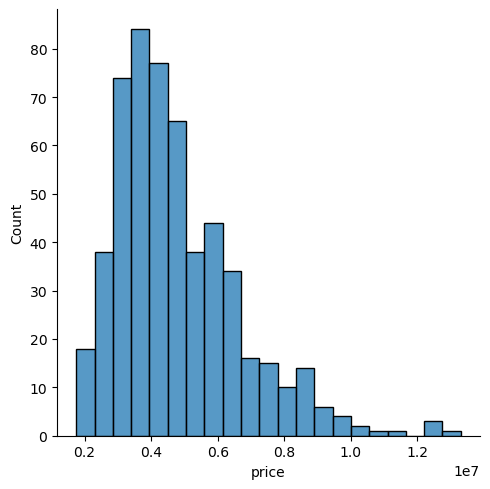

<Figure size 1000x700 with 0 Axes>

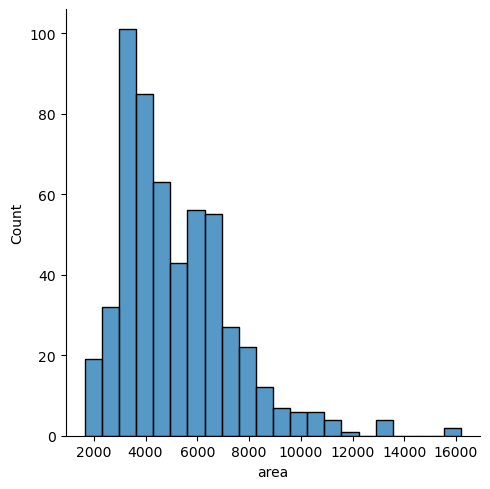

<Figure size 1000x700 with 0 Axes>

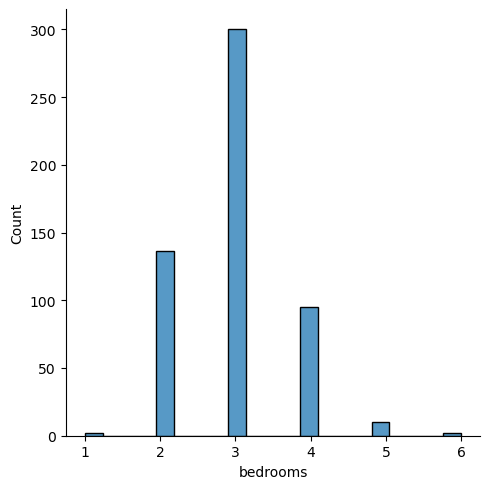

<Figure size 1000x700 with 0 Axes>

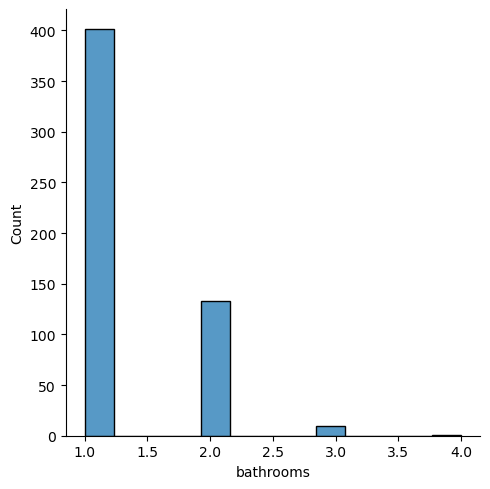

<Figure size 1000x700 with 0 Axes>

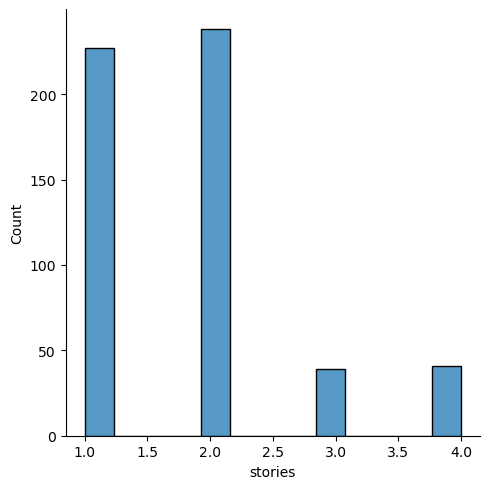

<Figure size 1000x700 with 0 Axes>

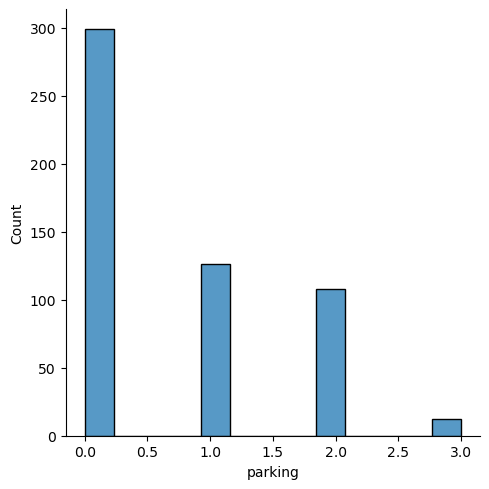

In [8]:
number_columns = housing.select_dtypes(['int','float'])

for num_col in number_columns:
    plt.figure(figsize=(10,7))
    sns.displot(housing[num_col],label=num_col)
    plt.show()

### Categorical column distribution 

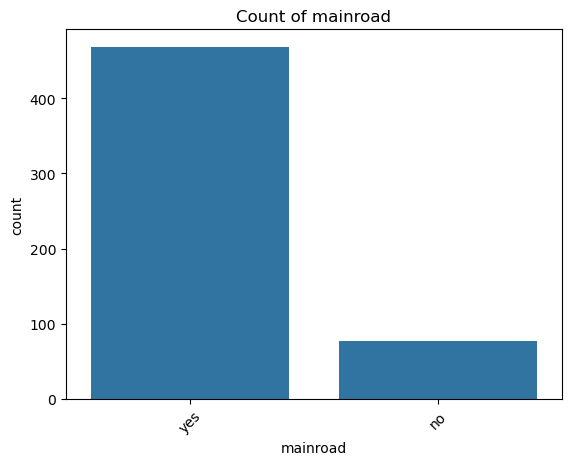

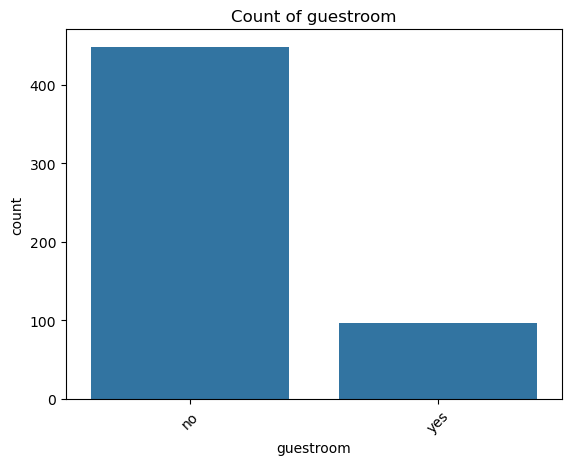

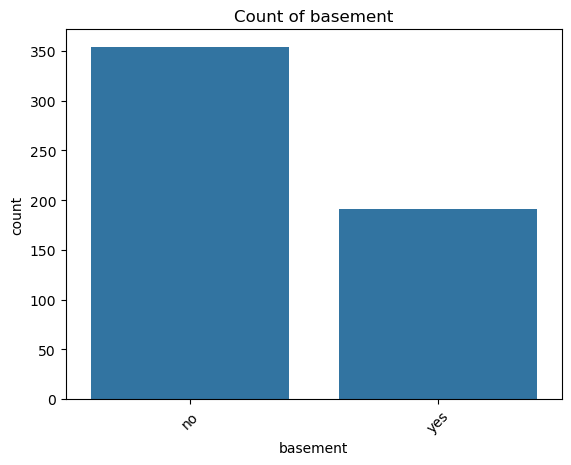

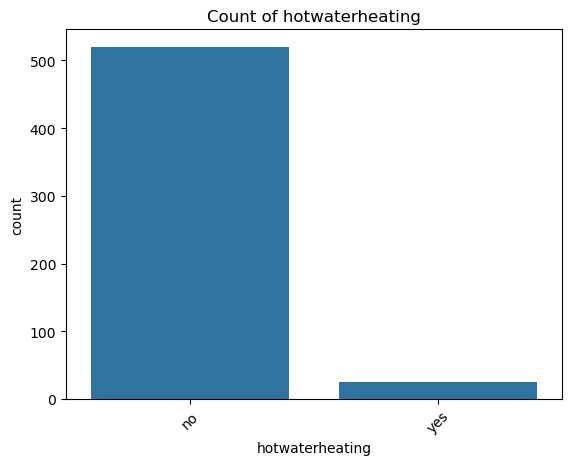

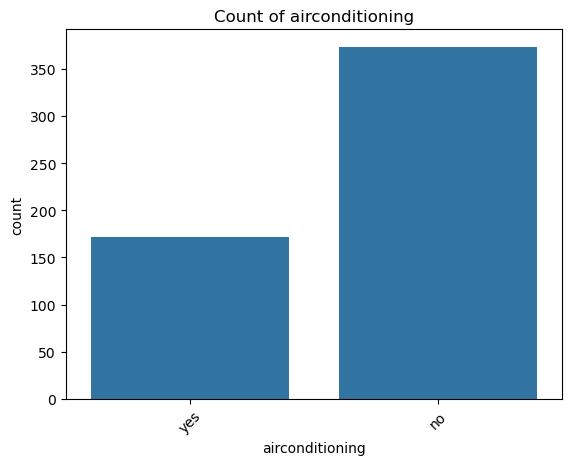

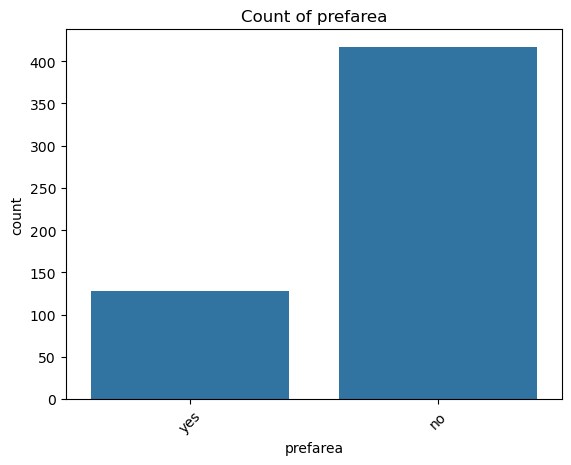

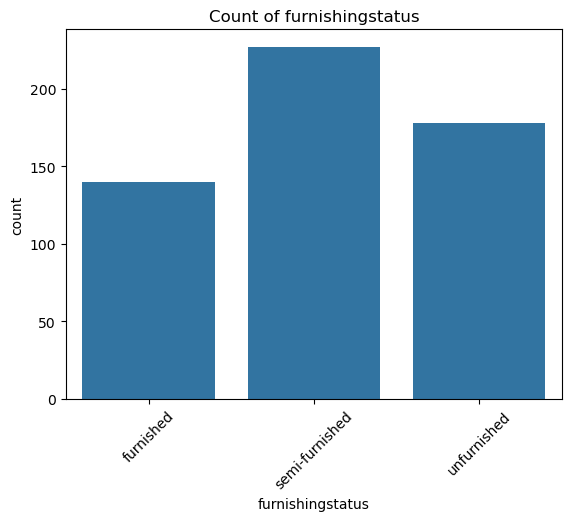

In [9]:
cat_columns = housing.select_dtypes(['object'])

for cat_col in cat_columns:
    sns.countplot(data=housing, x=cat_col)
    plt.xticks(rotation=45)
    plt.title("Count of "+cat_col)
    plt.show()

### Bivariate Analysis



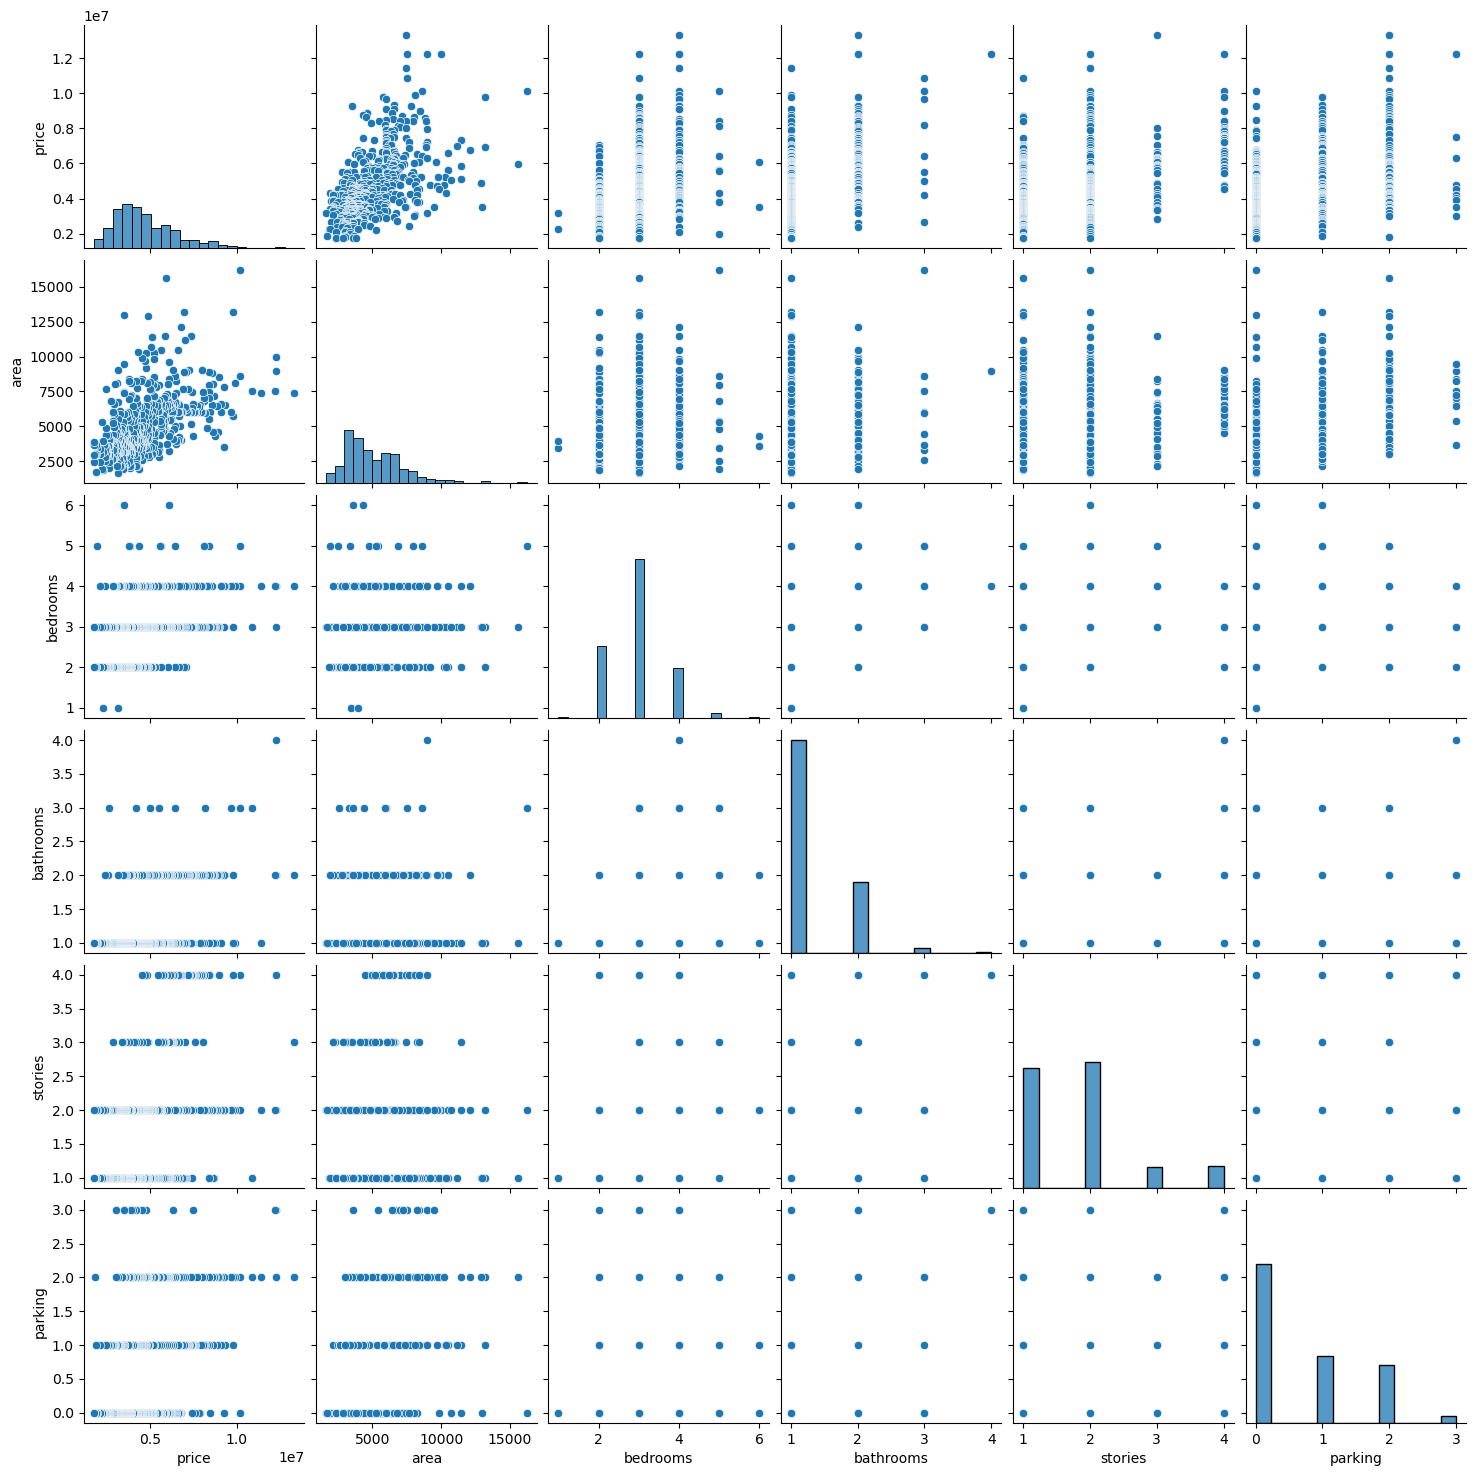

In [10]:
sns.pairplot(housing, vars=number_columns)
plt.show()

### Data Preparation

In [11]:
# List of variables to map from yes to 1 and no to 0

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [12]:
# Check the housing dataframe now

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [13]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

status = pd.get_dummies(housing['furnishingstatus'])

# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [14]:
#drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True).astype('int')

# Add the results to the original housing dataframe
housing = pd.concat([housing, status], axis = 1)

# Now let's see the head of our dataframe.
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [15]:
# Drop 'furnishingstatus' as we have created the dummies for it
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    int32
 13  unfurnished      545 non-null    int32
dtypes: int32(2), int64(12)
memory usage: 55.5 KB


### heatmap showing the corelation between various variables 

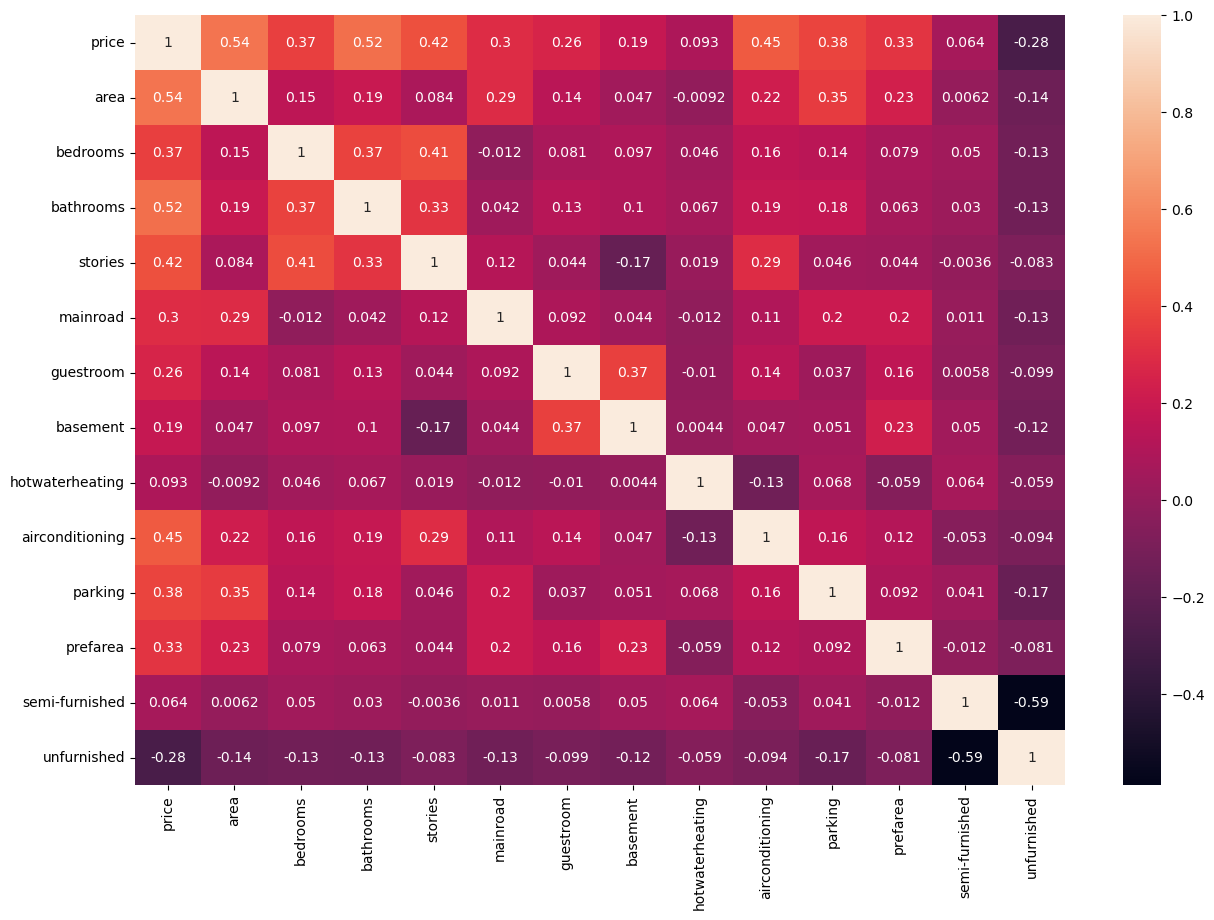

In [17]:
housing_cors = housing.corr()

plt.figure(figsize=(15,10))
sns.heatmap(housing_cors,annot=True)

plt.show()

In [18]:
def compress_dataframes(list_of_dfs):
    final_df = []
    for eachdf in list_of_dfs:
        original_size = (eachdf.memory_usage(index=True).sum())/ 1024**2
        int_cols = list(eachdf.select_dtypes(include=['int']).columns)
        float_cols = list(eachdf.select_dtypes(include=['float']).columns)
        for col in int_cols:
            if ((np.max(eachdf[col]) <= 127) and(np.min(eachdf[col] >= -128))):
                eachdf[col] = eachdf[col].astype(np.int8)
            elif ((np.max(eachdf[col]) <= 32767) and(np.min(eachdf[col] >= -32768))):
                eachdf[col] = eachdf[col].astype(np.int16)
            elif ((np.max(eachdf[col]) <= 2147483647) and(np.min(eachdf[col] >= -2147483648))):
                eachdf[col] = eachdf[col].astype(np.int32)
            else:
                eachdf[col] = eachdf[col].astype(np.int64)
    
        for col in float_cols:
            eachdf[col] = eachdf[col].astype(np.float16)
        compressed_size = (eachdf.memory_usage(index=True).sum())/ 1024**2
        
        final_df.append((eachdf,original_size,compressed_size))
        
    return final_df

In [19]:
housing_compressed, pre_size, post_size = compress_dataframes([housing])[0]
print("housig data DF before compress was in MB ,",pre_size.round(4), "and after compress , ", post_size.round(4))

housig data DF before compress was in MB , 0.0542 and after compress ,  0.0095


In [20]:
housing_compressed

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [21]:


# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housing_compressed, train_size = 0.7, test_size = 0.3, random_state = 27)

### Rescaling the Features 

We will use MinMax scaling.

In [22]:
scaler = MinMaxScaler()

In [23]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

scaled_array = scaler.fit_transform(df_train)

# Convert back to DataFrame with original columns
df_train_scaled = pd.DataFrame(scaled_array, columns=df_train.columns, index=df_train.index)
df_train_scaled.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
510,0.066667,0.084536,0.4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
372,0.163636,0.105155,0.4,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,1.0,0.0
481,0.103030,0.072165,0.2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
476,0.103030,0.288660,0.4,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.0,1.0
227,0.254545,0.298969,0.2,0.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.333333,0.0,0.0,0.0


### Dividing into X and Y sets for the model building

In [24]:
y_train = df_train_scaled.pop('price')
X_train = df_train_scaled



In [25]:
scaled_array = scaler.transform(df_test)

# Convert back to DataFrame with original columns
df_test_scaled = pd.DataFrame(scaled_array, columns=df_test.columns, index=df_test.index)
df_test_scaled.head()

y_test = df_test_scaled.pop('price')
X_test = df_test_scaled

## Building our model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

### Building model using SKlearn : this will not provide statistics of the model

In [26]:
# Running RFE with the output number of the variable equal to 10
model = LinearRegression()

# Initialize RFE with desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE on training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 2),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 3)]

In [28]:
# columns that are selected by RFE
col = X_train.columns[rfe.support_]
print(col)

selected_features = X_train.columns[rfe.support_]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')


In [29]:
# columns that are not selected by RFE
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [30]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [31]:
# Fit Linear Regression model on selected features
model.fit(X_train_rfe, y_train)

LinearRegression()

In [32]:
y_train_price = model.predict(X_train_rfe)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

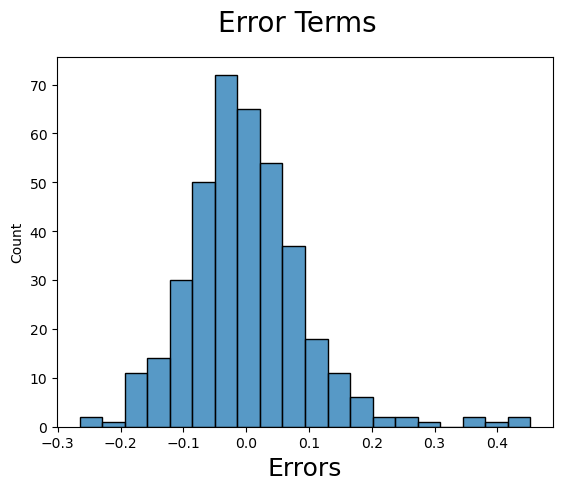

In [33]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.histplot((y_train - y_train_price), bins=20)  # use histplot instead of deprecated distplot
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [34]:
y_test = df_test['price']
X_test = df_test.drop('price', axis=1)

# Step 2: Scale features
X_test_scaled = scaler.transform(df_test)

# Step 3: Convert scaled features back to DataFrame
X_test_scaled = pd.DataFrame(scaled_array, columns=df_test.columns)

#### Dividing into X_test and y_test

In [35]:
# Making predictions
y_pred = model.predict(X_test_rfe)

## Model Evaluation

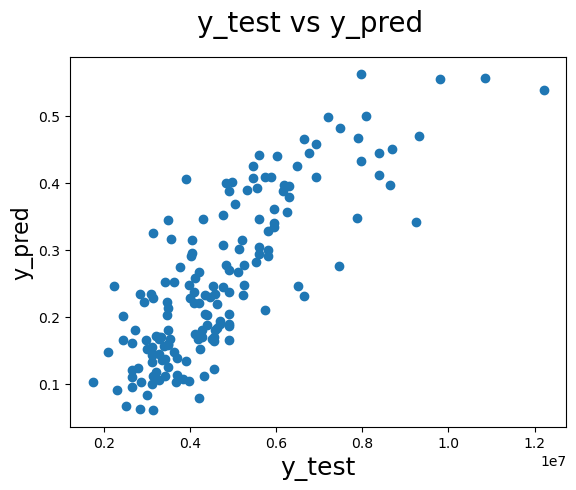

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {mse**0.5:.2f}")
print(f"R²: {r2:.2f}")


Mean absolute error: 4739830.78
Mean squared error: 25650554006781.53
Root mean squared error: 5064637.60
R²: -7.05


### Building model using statsmodel, for the detailed statistics

In [38]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [40]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [41]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     73.96
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           5.92e-82
Time:                        10:41:01   Log-Likelihood:                 355.50
No. Observations:                 381   AIC:                            -689.0
Df Residuals:                     370   BIC:                            -645.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0015      0.019     

`Bedrooms` is insignificant in presence of other variables; can be dropped

In [42]:
X_train_new = X_train_rfe.drop(["bedrooms"], axis = 1)

Rebuilding the model without `bedrooms`

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     81.36
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           3.02e-82
Time:                        10:41:01   Log-Likelihood:                 353.88
No. Observations:                 381   AIC:                            -687.8
Df Residuals:                     371   BIC:                            -648.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.014     

In [46]:
X_train_new.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [47]:
#X_train_new = X_train_new.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.70
1,area,1.39
3,stories,1.26
2,bathrooms,1.25
7,airconditioning,1.20
8,parking,1.20
4,mainroad,1.18
9,prefarea,1.13
5,guestroom,1.07
6,hotwaterheating,1.04


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [49]:
y_train_price = lm.predict(X_train_lm)

In [50]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Text(0.5, 0, 'Errors')

## Making Predictions

#### Applying the scaling on the test sets

#### Dividing into X_test and y_test

In [55]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

KeyError: "['const'] not in index"

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label